In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [5]:
df_a = df.copy()

In [6]:
df_a.drop(['id'], axis = 1, inplace = True)
df_a.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# Data Preprocessing


## Data Cleaning 

In [8]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)#Removed @mentions
    text = re.sub(r'#', '', text)#Removing the '#'symbol
    text = re.sub(r'RT[\S]+', '', text)#Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)#Remove the hyper link
    text = re.sub(r'[^\w\s]', '', text)#Removing punctuations 
    text = re.sub(r'\d', '', text)#Removing numbers
    text = re.sub(r'ð','', text)
    text = re.sub(r'â','', text)
    text = " ".join(text.lower() for x in text.split())#lowercase
    return text

In [9]:
df_a["tweet"] = df_a["tweet"].apply(cleanTxt)
df_a   

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i cant use cause they...
2,0,bihday your majesty bihday your majesty ...
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation factsgu...
...,...,...
31957,0,ate isz that youuuï ate isz that youuuï at...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso cond...


In [10]:
#stopwords
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

df_a['tweet'] = df_a['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df_a

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty bihday majesty bihday majesty
3,0,model love u take u time ur model love u take ...
4,0,factsguide society motivation factsguide socie...
...,...,...
31957,0,ate isz youuuï ate isz youuuï ate isz youuuï a...
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sa...
31960,1,sikh temple vandalised calgary wso condemns ac...


In [11]:
#remove sparse terms
terms = pd.Series(' '.join(df_a['tweet']).split()).value_counts()[-1000:]
df_a['tweet'] = df_a['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in terms))
df_a

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty bihday majesty bihday majesty
3,0,model love u take u time ur model love u take ...
4,0,factsguide society motivation factsguide socie...
...,...,...
31957,0,ate ate ate ate
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sa...
31960,1,sikh temple vandalised calgary wso condemns ac...


In [12]:
terms

footballso                                             5
morninggm                                              5
reggie                                                 5
fridayth                                               5
ãhappy                                                 5
                                                      ..
swheeet                                                1
wasmadwasibnoworsteverws                               1
michealkorswhitebagcuteinstahapgyinstacoolinstagram    1
stfuuuuu                                               1
fuccckkkkkkkkk                                         1
Length: 1000, dtype: int64

In [13]:
from textblob import Word
df_a['tweet'] = df_a['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
df_a

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty bihday majesty bihday majesty
3,0,model love u take u time ur model love u take ...
4,0,factsguide society motivation factsguide socie...
...,...,...
31957,0,ate ate ate ate
31958,0,see nina turner airwave trying wrap mantle gen...
31959,0,listening sad song monday morning otw work sad...
31960,1,sikh temple vandalised calgary wso condemns ac...


# Word Cloud

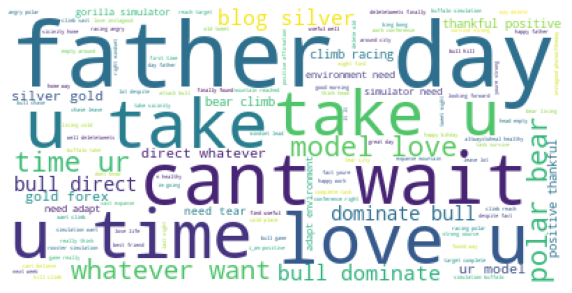

In [14]:
text = " ".join(i for i in df_a.tweet)
wordcloud = WordCloud(max_font_size = 100,
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Positive Tweet

In [15]:
positive = df_a[df_a['label']==0]['tweet']
positive

0        father dysfunctional selfish drag kid dysfunct...
1        thanks lyft credit cant use cause dont offer w...
2             bihday majesty bihday majesty bihday majesty
3        model love u take u time ur model love u take ...
4        factsguide society motivation factsguide socie...
                               ...                        
31956    fishing tomorrow carnt wait first time year fi...
31957                                      ate ate ate ate
31958    see nina turner airwave trying wrap mantle gen...
31959    listening sad song monday morning otw work sad...
31961    thank follow thank follow thank follow thank f...
Name: tweet, Length: 29720, dtype: object

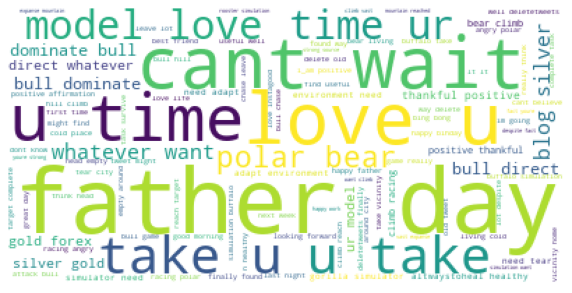

In [16]:
text = " ".join(i for i in positive)

wordcloud = WordCloud(max_font_size = 100,
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Negative Tweet

In [17]:
positive = df_a[df_a['label']==1]['tweet']
positive

13       cnn call michigan middle school build wall cha...
14       comment australia opkillingbay seashepherd hel...
17       retweet agree retweet agree retweet agree retw...
23       lumpy say prove lumpy lumpy say prove lumpy lu...
34       unbelievable st century wed need something lik...
                               ...                        
31934    lady banned kentucky mall jcpenny kentucky lad...
31946    omfg im offended im mailbox im proud mailboxpr...
31947    dont ball hashtag say weasel away lumpy tony d...
31948    make ask anybody god oh thank god make ask any...
31960    sikh temple vandalised calgary wso condemns ac...
Name: tweet, Length: 2242, dtype: object

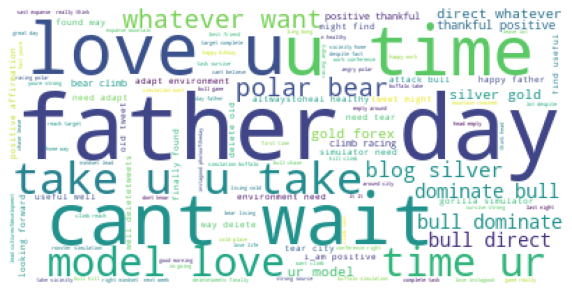

In [18]:
wordcloud = WordCloud(max_font_size = 100,
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
df_a

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty bihday majesty bihday majesty
3,0,model love u take u time ur model love u take ...
4,0,factsguide society motivation factsguide socie...
...,...,...
31957,0,ate ate ate ate
31958,0,see nina turner airwave trying wrap mantle gen...
31959,0,listening sad song monday morning otw work sad...
31960,1,sikh temple vandalised calgary wso condemns ac...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

In [21]:
train_x, test_x, train_y, test_y = model_selection.train_test_split( df_a["tweet"],
                                                                   df_a["label"])

In [22]:
len(test_x)

7991

In [23]:
train_y

16971    0
16335    0
8613     0
24232    1
24472    0
        ..
21915    0
14615    0
11128    0
4450     0
18781    0
Name: label, Length: 23971, dtype: int64

In [24]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [25]:
train_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
test_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
cv = CountVectorizer(max_features = 5000)
cv.fit(train_x)
x_train_count = cv.transform(train_x)
x_test_count = cv.transform(test_x)

In [28]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
tfidf_vec = TfidfVectorizer(max_features = 2500)
tfidf_vec.fit(train_x)
x_train_tfidfword = tfidf_vec.transform(train_x)
x_test_tfidfword = tfidf_vec.transform(test_x)

In [30]:
x_train_tfidfword.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Naive Bayes

In [31]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count, train_y)

In [32]:
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Accuracy:", accuracy)

Count Vectors Doğruluk Oranı: 0.9050184605757196


In [33]:
nb_model = nb.fit(x_train_tfidfword, train_y)

In [34]:
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tfidfword, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Accuracy:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.9459388297872341


In [35]:
predict_y = pd.Series(nb_model.predict(x_test_tfidfword))

In [73]:
predict_y

0       0
1       0
2       0
3       0
4       0
       ..
7986    0
7987    0
7988    0
7989    0
7990    0
Length: 7991, dtype: int64

In [36]:
test_x

867      tried new trailnv today although feel similar ...
8428     bihday one dear friend entire planet hope day ...
3925     boarding ze plane see bring rstn boarding ze p...
22053    finally found way delete old tweet might find ...
25482    big horn love fishing camping nature fathersda...
                               ...                        
17431    sex power puff girl nude sex power puff girl n...
25904    thankful sense hearing thankful positive thank...
3555     build website dummy design blog beautiful buil...
6157     think everything life right leapoffaith im sca...
581      good moooooorning tgif kiss kiss friday friday...
Name: tweet, Length: 7991, dtype: object

In [37]:
df_pred = pd.DataFrame()
df_pred["tweet"] = test_x
df_pred["label"] = test_y

In [39]:
df_pred

,tweet,label
867,tried new trailnv today although feel similar ...,0
8428,bihday one dear friend entire planet hope day ...,0
3925,boarding ze plane see bring rstn boarding ze p...,0
22053,finally found way delete old tweet might find ...,0
25482,big horn love fishing camping nature fathersda...,0
...,...,...
17431,sex power puff girl nude sex power puff girl n...,0
25904,thankful sense hearing thankful positive thank...,0
3555,build website dummy design blog beautiful buil...,0
6157,think everything life right leapoffaith im sca...,0


In [40]:
predict_y

0       0
1       0
2       0
3       0
4       0
       ..
7986    0
7987    0
7988    0
7989    0
7990    0
Length: 7991, dtype: int64

In [41]:
df_pred.label.value_counts()

0    7462
1     529
Name: label, dtype: int64

In [42]:
predict_y.value_counts()

0    7796
1     195
dtype: int64